# Regularization

## 1)Introduction to Regularization

Regularization helps prevent overfitting in models. It's like finding the right balance between learning from examples and not getting too caught up in them.



## 2)The Problem of Overfitting

Imagine trying to memorize a story instead of understanding it. Overfitting is like memorizing every detail but missing the main idea.

## 3) Regularization types: L1 (Lasso) and L2 (Ridge)

L1 (Lasso) and L2 (Ridge) help us find a middle ground. L1 makes some parts really small or zero, like having a checklist where some items aren't important. L2 gently pushes things closer together, like finding an average.

L1: Counts how big the coefficients (w) are and tries to make some of them very small (or zero).

L1 Regularization

$$
Modified loss function = Loss function + λ \sum\limits_{i=1}^n \vert w_i \vert
$$

L2: Tries to keep all the coefficients in check—neither too big nor too small.

L2 Regularization

$$
Modified loss function = Loss function + λ \sum\limits_{i=1}^n w_i^2
$$

Elastic Net balances between L1 (Lasso) and L2 (Ridge) regularization. It's like having a list where some items become unimportant and get crossed out (Lasso), while also adjusting everything a bit to find a balance (Ridge).

$$
\sum\limits_{i=1}^M(y_i - \widehat{\boldsymbol y}_i)^2 = \sum\limits_{i=1}^M(y_i - \sum\limits_{j=0}^p w_j × w_{ij})^2
$$

This combined penalty term allows Elastic Net to benefit from both L1 and L2 regularization techniques, offering a flexible approach to handle multicollinearity and perform feature selection simultaneously.

## Example: Impact of L1, L2 Regularization and Elastic Net 

Before Regularization:

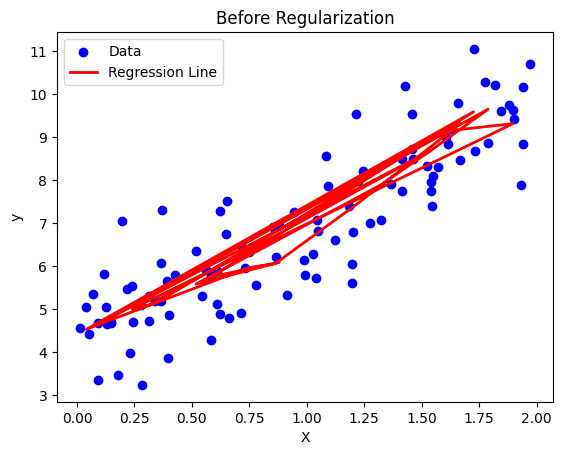

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to plot the data and the regression line
def plot_results(model, title):
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Regression Line')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

model_before_regularization = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
model_before_regularization.fit(X_train, y_train)
plot_results(model_before_regularization, 'Before Regularization')


The model learns from the data without any restrictions on coefficients.

It might capture both essential and less important features equally.

## After Applying L1 (Lasso) Regularization:

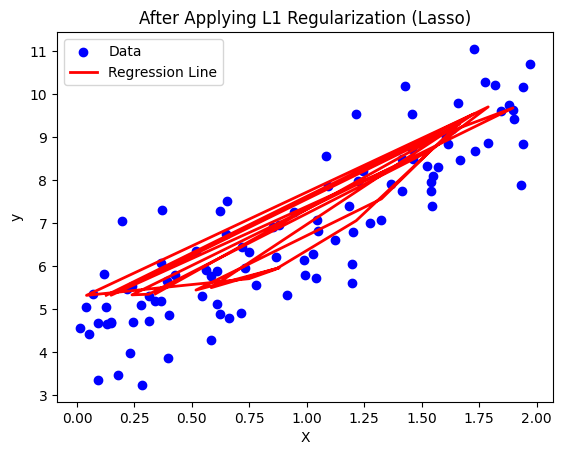

In [10]:
model_l1_regularization = make_pipeline(PolynomialFeatures(degree=10), Lasso(alpha=0.1))
model_l1_regularization.fit(X_train, y_train)
plot_results(model_l1_regularization, 'After Applying L1 Regularization (Lasso)')

Lasso shrinks less important features' coefficients towards zero.

Some coefficients become exactly zero, effectively removing less relevant features.

Helps in feature selection, keeping only the most crucial ones.

## After Applying L2 (Ridge) Regularization:

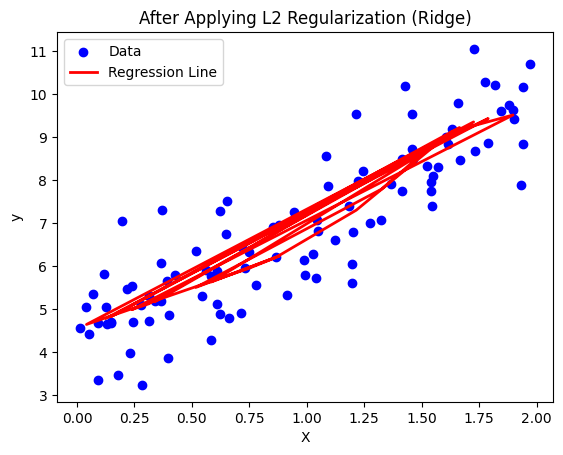

In [11]:
model_l2_regularization = make_pipeline(PolynomialFeatures(degree=10), Ridge(alpha=0.1))
model_l2_regularization.fit(X_train, y_train)
plot_results(model_l2_regularization, 'After Applying L2 Regularization (Ridge)')

Ridge pushes all coefficients towards zero but not exactly to zero.

It reduces the impact of less important features, but they don’t become zero.

Helps in handling multicollinearity and keeping all features in check.


## After Applying Elastic Net:

C:\Users\murat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e-01, tolerance: 2.805e-02
  model = cd_fast.enet_coordinate_descent(


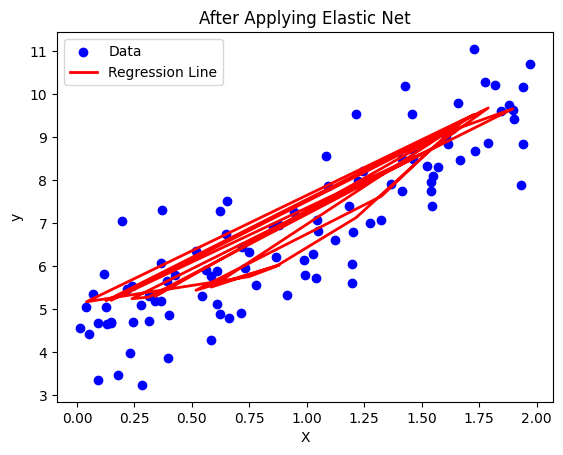

In [12]:
model_elastic_net = make_pipeline(PolynomialFeatures(degree=10), ElasticNet(alpha=0.1, l1_ratio=0.5))
model_elastic_net.fit(X_train, y_train)
plot_results(model_elastic_net, 'After Applying Elastic Net')

Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization.

It balances both techniques using the l1_ratio parameter.

α controls regularization strength, while l1_ratio adjusts the balance between L1 and L2 regularization.

## Conclusion

Regularization techniques—L1 (Lasso), L2 (Ridge), and Elastic Net—serve as guardians against overfitting, ensuring machine learning models strike the right balance between complexity and simplicity.

These regularization techniques serve as powerful tools, ensuring models learn effectively from data without getting too caught up in unnecessary details. By adjusting the regularization parameters, practitioners can control the model's complexity, making it a crucial aspect of building robust and reliable predictive models in machine learning.

## Quiz

In [16]:
import ipywidgets as widgets
from IPython.display import display

# Вопросы и ответы
questions = [
    "What is the primary purpose of regularization in machine learning?",
    "Which type of regularization adds a penalty term based on the absolute values of the model weights?",
    "What does a higher regularization parameter (λ) generally indicate?",
    "In ridge regression, what happens to the weights of less important features as the regularization parameter increases?",
    "Which section of the machine learning pipeline is regularization typically applied to?",
    "What is the potential drawback of applying too much regularization to a model?",
    "In a scenario where a model is overfitting the training data, which type of regularization is more likely to be beneficial?",
    "How does regularization contribute to improving a model's performance on unseen data?",
    "Which library in Python commonly provides functions for implementing regularization in machine learning models?",
    "What is the purpose of the comparative analysis discussed in the examples section?"
]

# Ответы для каждого вопроса
answers = [
    ["To increase overfitting", "To decrease model complexity", "To eliminate all features"],
    ["L1 regularization", "L2 regularization", "Both L1 and L2 regularization"],
    ["Stronger regularization", "Weaker regularization", "No effect on regularization"],
    ["They increase", "They decrease", "They remain unchanged"],
    ["Data preprocessing", "Model training", "Model evaluation"],
    ["Increased risk of overfitting", "Loss of important features", "Improved model generalization"],
    ["L1 regularization", "L2 regularization", "Both L1 and L2 regularization"],
    ["By memorizing training examples", "By reducing model variance", "By increasing model complexity"],
    ["TensorFlow", "PyTorch", "scikit-learn"],
    ["To confuse the reader", "To illustrate the impact of regularization", "To showcase unrelated models"]
]

# Правильные ответы
correct_answers = [1, 0, 0, 1, 1, 0, 0, 1, 2, 1]  # Index of the correct answer for each question

# Создание виджетов для вопросов и ответов
question_widgets = [widgets.HTML(value=f"<strong>{question}</strong>") for question in questions]
answer_widgets = [widgets.RadioButtons(options=ans, layout={'width': 'max-content'}) for ans in answers]

# Создание кнопки для отправки ответов
submit_button = widgets.Button(description="Submit")
output = widgets.Output()

# Функция для обработки нажатия кнопки
def check_answers(_):
    selected_answers = [widget.index for widget in answer_widgets]
    total_correct = sum([1 for selected, correct in zip(selected_answers, correct_answers) if selected == correct])
    with output:
        print(f"You got {total_correct} out of {len(questions)} questions correct!")

# Назначение функции для кнопки
submit_button.on_click(check_answers)

# Отображение виджетов
for question, answer_widget in zip(question_widgets, answer_widgets):
    display(question, answer_widget)

display(submit_button, output)

HTML(value='<strong>What is the primary purpose of regularization in machine learning?</strong>')

RadioButtons(layout=Layout(width='max-content'), options=('To increase overfitting', 'To decrease model comple…

HTML(value='<strong>Which type of regularization adds a penalty term based on the absolute values of the model…

RadioButtons(layout=Layout(width='max-content'), options=('L1 regularization', 'L2 regularization', 'Both L1 a…

HTML(value='<strong>What does a higher regularization parameter (λ) generally indicate?</strong>')

RadioButtons(layout=Layout(width='max-content'), options=('Stronger regularization', 'Weaker regularization', …

HTML(value='<strong>In ridge regression, what happens to the weights of less important features as the regular…

RadioButtons(layout=Layout(width='max-content'), options=('They increase', 'They decrease', 'They remain uncha…

HTML(value='<strong>Which section of the machine learning pipeline is regularization typically applied to?</st…

RadioButtons(layout=Layout(width='max-content'), options=('Data preprocessing', 'Model training', 'Model evalu…

HTML(value='<strong>What is the potential drawback of applying too much regularization to a model?</strong>')

RadioButtons(layout=Layout(width='max-content'), options=('Increased risk of overfitting', 'Loss of important …

HTML(value='<strong>In a scenario where a model is overfitting the training data, which type of regularization…

RadioButtons(layout=Layout(width='max-content'), options=('L1 regularization', 'L2 regularization', 'Both L1 a…

HTML(value="<strong>How does regularization contribute to improving a model's performance on unseen data?</str…

RadioButtons(layout=Layout(width='max-content'), options=('By memorizing training examples', 'By reducing mode…

HTML(value='<strong>Which library in Python commonly provides functions for implementing regularization in mac…

RadioButtons(layout=Layout(width='max-content'), options=('TensorFlow', 'PyTorch', 'scikit-learn'), value='Ten…

HTML(value='<strong>What is the purpose of the comparative analysis discussed in the examples section?</strong…

RadioButtons(layout=Layout(width='max-content'), options=('To confuse the reader', 'To illustrate the impact o…

Button(description='Submit', style=ButtonStyle())

Output()